In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\Gym churn data\gym_churn_us.csv")

In [4]:
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
886,1,1,1,0,1,12,1,26,80.662382,12.0,1,0.326090,0.000000,1
2143,1,1,1,0,1,12,0,30,332.776450,12.0,1,0.915357,0.853282,0
881,1,0,0,0,1,1,0,28,134.023795,1.0,1,3.169257,3.076860,1
863,1,0,0,0,0,1,0,27,10.847255,1.0,0,1.600893,1.609173,1
1900,0,1,0,0,1,1,0,30,246.326302,1.0,0,0.597996,0.570218,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [10]:
df.iloc[:, [7, 8, 11, 12]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
Avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783


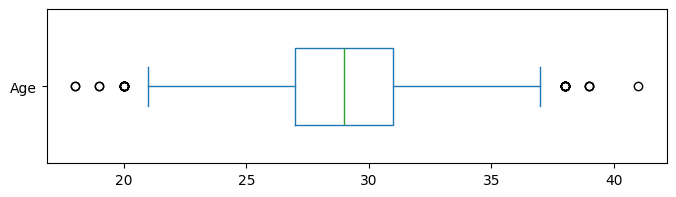

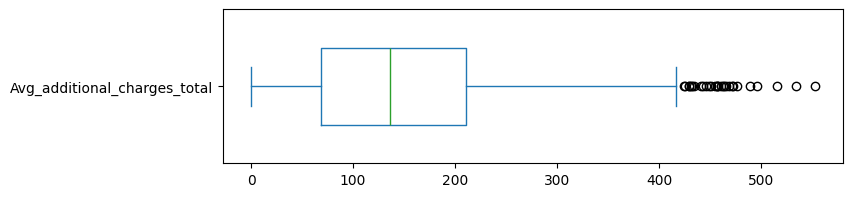

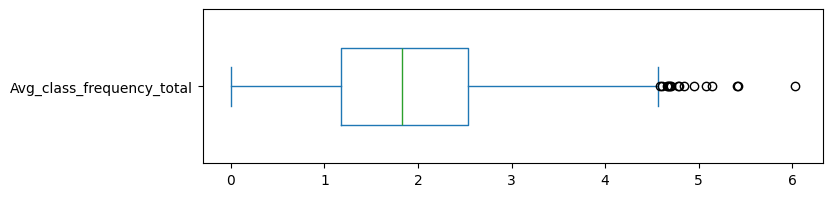

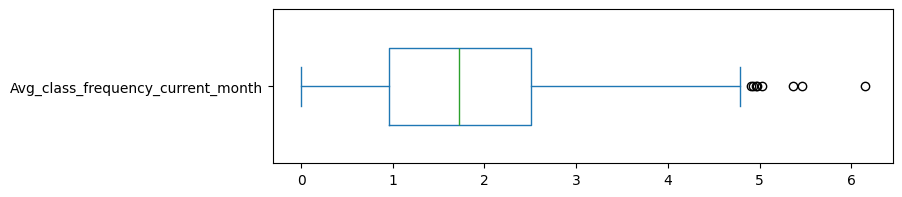

In [15]:
for i in [7, 8, 11, 12]:
    df.iloc[:, i].plot.box(vert=False, figsize=(8, 2), widths=0.5)
    plt.show()

In [17]:
df.corr()["Churn"]

gender                               0.000708
Near_Location                       -0.128098
Partner                             -0.157986
Promo_friends                       -0.162233
Phone                               -0.001177
Contract_period                     -0.389984
Group_visits                        -0.175325
Age                                 -0.404735
Avg_additional_charges_total        -0.198697
Month_to_end_contract               -0.381393
Lifetime                            -0.438220
Avg_class_frequency_total           -0.249715
Avg_class_frequency_current_month   -0.412348
Churn                                1.000000
Name: Churn, dtype: float64

In [19]:
df.drop(["gender", "Phone"], axis=1, inplace=True)

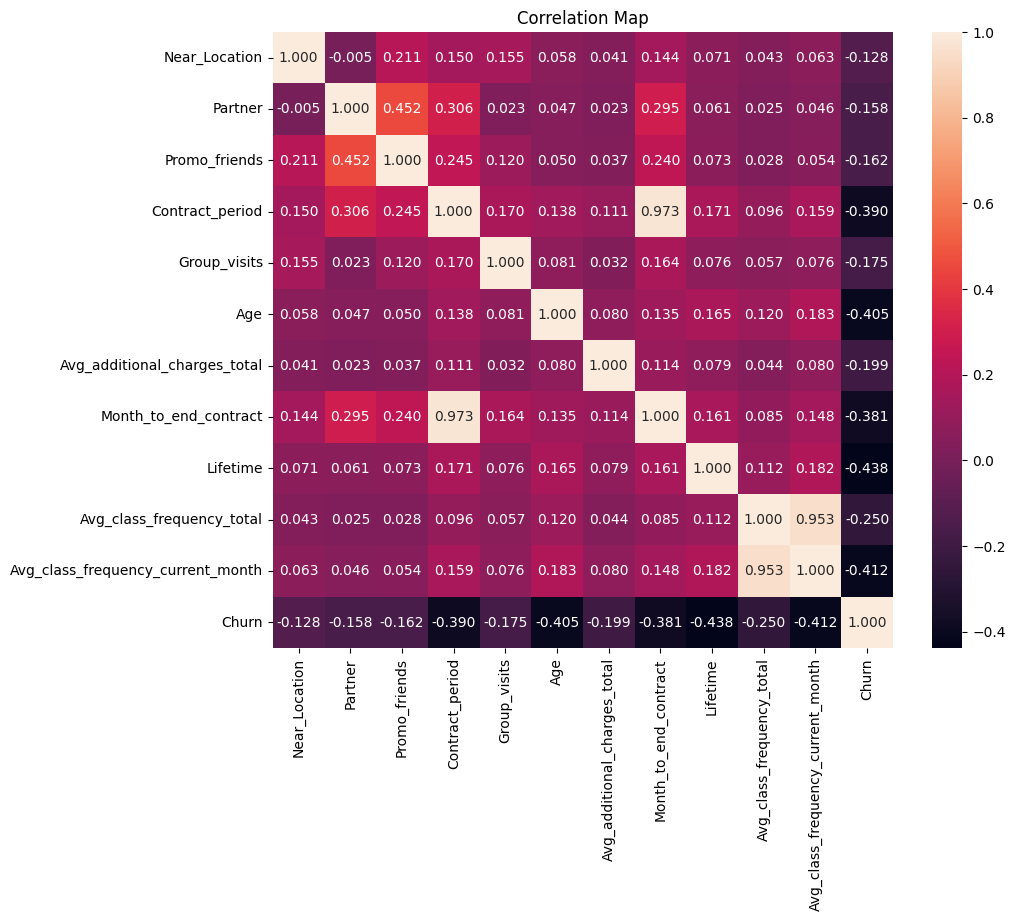

In [21]:
plt.figure(figsize=(10, 8))
plt.title("Correlation Map")
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [22]:
X = df.drop("Churn", axis=1)

In [23]:
y = df["Churn"]

In [24]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=43)

In [25]:
scaler = StandardScaler()

In [27]:
X_tr.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
220,1,1,1,1,0,31,259.244902,1.0,3,1.778478,1.621739
2504,1,0,0,6,1,36,198.189377,5.0,3,3.697441,3.880265
2167,1,1,0,1,0,28,96.370420,1.0,2,0.078059,0.000000
1043,1,0,0,12,1,33,275.025084,11.0,4,0.402946,0.508431
3038,1,0,0,1,0,30,311.915088,1.0,3,1.576665,1.626643


In [28]:
X_tr.iloc[:,[3, 5, 6, 7, 9, 10]] = scaler.fit_transform(X_tr.iloc[:,[3, 5, 6, 7, 9, 10]])

In [29]:
X_tr.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
220,1,1,1,-0.816315,0,0.541604,1.157550,-0.798825,3,-0.108084,-0.143199
2504,1,0,0,0.277836,1,2.061743,0.524119,0.149335,3,1.877192,2.010947
2167,1,1,0,-0.816315,0,-0.370480,-0.532220,-0.798825,2,-1.867264,-1.689988
1043,1,0,0,1.590817,1,1.149660,1.321264,1.571576,4,-1.531150,-1.205054
3038,1,0,0,-0.816315,0,0.237576,1.703986,-0.798825,3,-0.316871,-0.138521


In [30]:
X_te.iloc[:,[3, 5, 6, 7, 9, 10]] = scaler.transform(X_te.iloc[:,[3, 5, 6, 7, 9, 10]])

In [31]:
X_te.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
376,1,0,0,-0.816315,1,-3.106730,0.157726,-0.798825,0,-1.092382,-1.460727
777,0,1,0,-0.816315,1,-1.282563,0.675169,-0.798825,3,0.124654,0.111244
2012,0,0,0,-0.816315,0,-0.674507,-1.479504,-0.798825,1,0.132511,-1.542845
309,1,1,0,0.277836,0,1.149660,-0.736339,-0.087705,7,1.660161,1.596202
3276,1,1,1,0.277836,1,-0.066452,-1.397136,0.386375,1,0.022860,0.270961


In [33]:
model = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

In [34]:
model.fit(X_tr, y_tr)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [35]:
model.score(X_tr, y_tr)

0.9228571428571428

In [36]:
y_pr = model.predict(X_te)

In [37]:
accuracy_score(y_te, y_pr)

0.9116666666666666

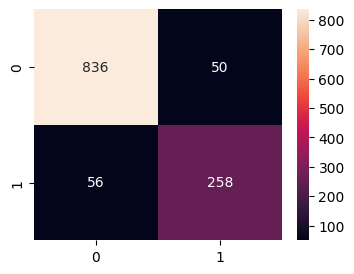

In [39]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True, fmt="d")
plt.show()

In [40]:
gscv = GridSearchCV(estimator=KNeighborsClassifier(), 
                    param_grid={"n_neighbors":[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]},
                   verbose=True, cv=10, n_jobs=-1)

In [41]:
gscv.fit(X_tr, y_tr)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]},
             verbose=True)

In [42]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [43]:
new_y_pr = gscv.best_estimator_.predict(X_te)

In [44]:
accuracy_score(y_te, new_y_pr)

0.9175

In [45]:
gscv.best_score_

0.9099999999999999